In [1]:
import math
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('daily_data.csv')

In [3]:
df=df.set_index('Date')

In [4]:
df.shape

(1400, 1)

In [5]:
# df['total'].isnull().sum()
# df['total']=df['total'].astype(int)
df.dtypes

Consumption (Kwh)    float64
dtype: object

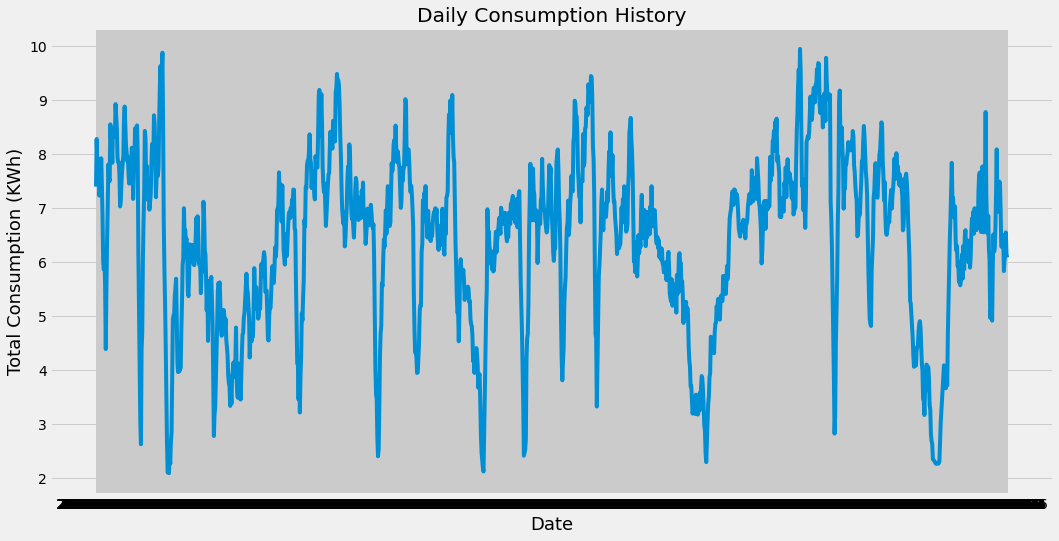

In [6]:
plt.figure(figsize=(16,8))
plt.title("Daily Consumption History")
plt.plot(df['Consumption (Kwh)'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Consumption (KWh)',fontsize=18)
plt.show()

In [7]:
data=df.filter(['Consumption (Kwh)'])
dataset=data.values

training_data_len=math.ceil(len(dataset)*0.8)

training_data_len


1120

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.6753991 ],
       [0.78772002],
       [0.73418838],
       ...,
       [0.56734434],
       [0.51696002],
       [0.50838223]])

In [9]:
train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.6753991 , 0.78772002, 0.73418838, 0.70394324, 0.73996452,
       0.65426843, 0.66235503, 0.69065357, 0.74214763, 0.6800473 ,
       0.60595807, 0.4996407 , 0.4798017 , 0.51384   , 0.43853186,
       0.29240005, 0.43907764, 0.54625006, 0.62661573, 0.72785737,
       0.69528358, 0.68847046, 0.82224041, 0.7857916 , 0.79022149,
       0.73150498, 0.81393551, 0.79450584, 0.80260154, 0.79226816,
       0.86999591, 0.84177014, 0.8129804 , 0.74373039, 0.73310593,
       0.73362441, 0.70136899, 0.62873516, 0.64031473, 0.68189385,
       0.71203893, 0.73061354, 0.74909719, 0.8374494 , 0.8641288 ,
       0.81535453, 0.77361168, 0.75356347, 0.73580752, 0.74600446,
       0.70192386, 0.68235776, 0.70813663, 0.73521626, 0.73402465,
       0.76715332, 0.74787829, 0.64637286, 0.70941011, 0.74102879])]
[0.8126893164142475]



In [10]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1060, 60, 1)

In [12]:
# model=Sequential()

# model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(50,return_sequences=False))
# #model.add(Dropout(0.5,input_shape=(60,1)))
# model.add(Dense(1))
# tf.keras.layers.Lambda(lambda x: x * 400)

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))


In [13]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1)))   #prev (30,1)
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(60))
tf.keras.layers.Dense(10, activation="relu")
model.add(Dense(1))
tf.keras.layers.Lambda(lambda x: x * 400)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [14]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 32)            11904     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                22320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 49,165
Trainable params: 49,165
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=model.fit(x_train,y_train,batch_size=200,epochs=150,verbose=1,callbacks=[lr_schedule])

Epoch 1/150
6/6 [==============================] - 2s 255ms/step - loss: 0.1609 - mae: 0.5332 - lr: 1.0000e-08
Epoch 2/150
6/6 [==============================] - 1s 249ms/step - loss: 0.1609 - mae: 0.5332 - lr: 1.1220e-08
Epoch 3/150
6/6 [==============================] - 1s 249ms/step - loss: 0.1609 - mae: 0.5332 - lr: 1.2589e-08
Epoch 4/150
6/6 [==============================] - 2s 260ms/step - loss: 0.1609 - mae: 0.5332 - lr: 1.4125e-08
Epoch 5/150
6/6 [==============================] - 2s 267ms/step - loss: 0.1609 - mae: 0.5332 - lr: 1.5849e-08
Epoch 6/150
6/6 [==============================] - 2s 250ms/step - loss: 0.1609 - mae: 0.5332 - lr: 1.7783e-08
Epoch 7/150
6/6 [==============================] - 1s 250ms/step - loss: 0.1609 - mae: 0.5332 - lr: 1.9953e-08
Epoch 8/150
6/6 [==============================] - 2s 262ms/step - loss: 0.1609 - mae: 0.5332 - lr: 2.2387e-08
Epoch 9/150
6/6 [==============================] - 2s 264ms/step - loss: 0.1609 - mae: 0.5332 - lr: 2.5119e-08
E

6/6 [==============================] - 2s 256ms/step - loss: 0.0122 - mae: 0.1182 - lr: 0.2239
Epoch 149/150
6/6 [==============================] - 2s 313ms/step - loss: 0.0126 - mae: 0.1210 - lr: 0.2512
Epoch 150/150
6/6 [==============================] - 2s 300ms/step - loss: 0.0121 - mae: 0.1168 - lr: 0.2818


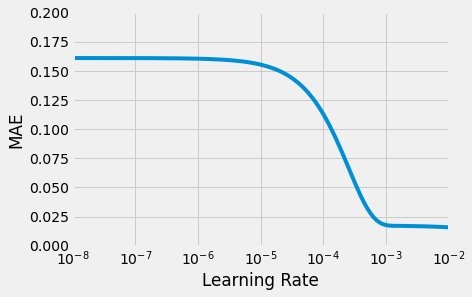

In [28]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-2, 0, 0.2])
plt.xlabel('Learning Rate')
plt.ylabel('MAE')

plt.savefig('learn.png')

In [16]:
optimizer = tf.keras.optimizers.SGD(lr=2e-3, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


history = model.fit(x_train,y_train,batch_size=80,epochs=120,verbose=1)

Epoch 1/120
14/14 [==============================] - 2s 125ms/step - loss: 0.1395 - mae: 0.4828
Epoch 2/120
14/14 [==============================] - 2s 144ms/step - loss: 0.0268 - mae: 0.1896
Epoch 3/120
14/14 [==============================] - 2s 146ms/step - loss: 0.0233 - mae: 0.1616
Epoch 4/120
14/14 [==============================] - 1s 68ms/step - loss: 0.0205 - mae: 0.1549
Epoch 5/120
14/14 [==============================] - 2s 143ms/step - loss: 0.0195 - mae: 0.1573
Epoch 6/120
14/14 [==============================] - 2s 116ms/step - loss: 0.0195 - mae: 0.1580
Epoch 7/120
14/14 [==============================] - 1s 85ms/step - loss: 0.0193 - mae: 0.1565
Epoch 8/120
14/14 [==============================] - 2s 144ms/step - loss: 0.0192 - mae: 0.1545
Epoch 9/120
14/14 [==============================] - 2s 149ms/step - loss: 0.0191 - mae: 0.1536
Epoch 10/120
14/14 [==============================] - 2s 140ms/step - loss: 0.0190 - mae: 0.1540
Epoch 11/120
14/14 [=====================

14/14 [==============================] - 2s 135ms/step - loss: 0.0133 - mae: 0.1237
Epoch 86/120
14/14 [==============================] - 2s 124ms/step - loss: 0.0133 - mae: 0.1227
Epoch 87/120
14/14 [==============================] - 1s 79ms/step - loss: 0.0132 - mae: 0.1227
Epoch 88/120
14/14 [==============================] - 2s 144ms/step - loss: 0.0132 - mae: 0.1223
Epoch 89/120
14/14 [==============================] - 1s 99ms/step - loss: 0.0132 - mae: 0.1219
Epoch 90/120
14/14 [==============================] - 2s 108ms/step - loss: 0.0131 - mae: 0.1218
Epoch 91/120
14/14 [==============================] - 2s 146ms/step - loss: 0.0131 - mae: 0.1213
Epoch 92/120
14/14 [==============================] - 2s 148ms/step - loss: 0.0131 - mae: 0.1219
Epoch 93/120
14/14 [==============================] - 1s 70ms/step - loss: 0.0130 - mae: 0.1213
Epoch 94/120
14/14 [==============================] - 2s 131ms/step - loss: 0.0130 - mae: 0.1206
Epoch 95/120
14/14 [==========================

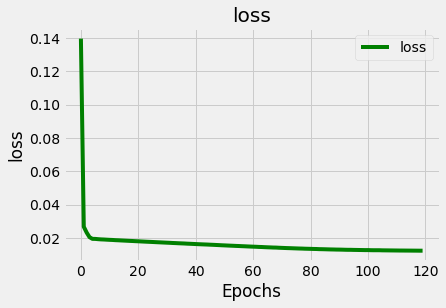

<Figure size 432x288 with 0 Axes>

In [17]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

loss=history.history['loss']

epochs=range(len(loss))

plt.plot(epochs, loss, 'g')
plt.title('loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["loss"])
# plt.axis([0, 100, 0, 0.015])
plt.figure()


plt.savefig('loss vs epoch.png')

<Figure size 432x288 with 0 Axes>

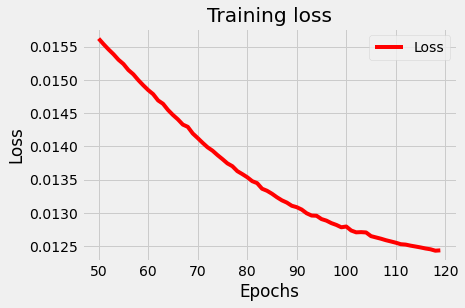

<Figure size 432x288 with 0 Axes>

In [19]:
zoomed_loss = loss[50:]
zoomed_epochs = range(50,120)

plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
# plt.axis([80, 100, 0.02, 0.018])
plt.figure()

In [20]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [21]:
x_test=np.array(x_test)

In [22]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
predictions=model.predict(x_test)

predictions= scaler.inverse_transform(predictions)

In [24]:
predictions.shape

(280, 1)

In [25]:
rmse= np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

1.282838689040602

<ipython-input-29-60f11cca3db6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


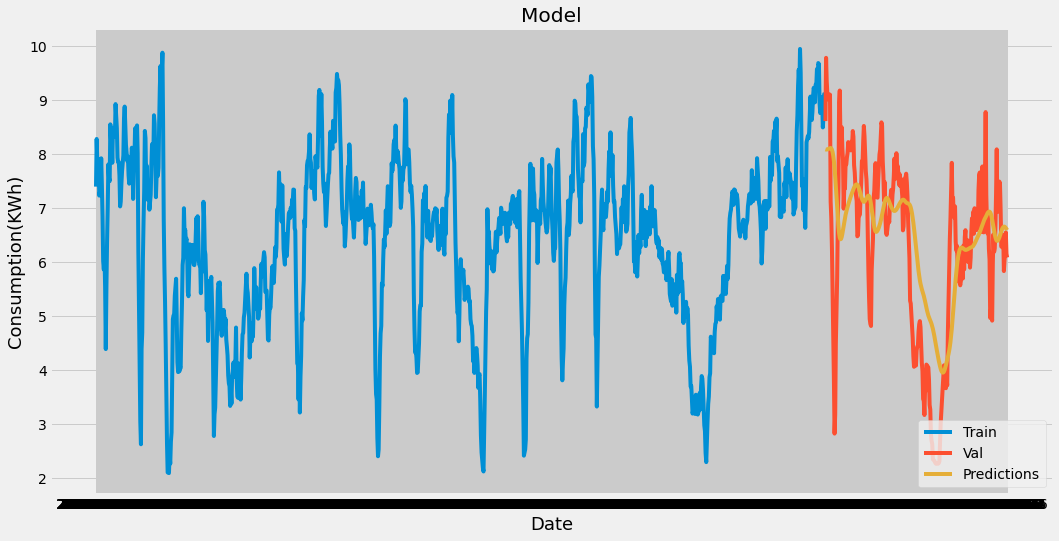

In [29]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Consumption(KWh)',fontsize=18)
plt.plot(train['Consumption (Kwh)'])
plt.plot(valid[['Consumption (Kwh)','Predictions']])
plt.legend(["Train","Val","Predictions"],loc='lower right')
plt.show()

In [30]:
valid

,Consumption (Kwh),Predictions
Date,,
2010-02-20,8.616214,8.092248
2010-02-21,9.786143,8.088434
2010-02-22,9.347143,8.088640
2010-02-23,9.113214,8.092129
2010-02-24,9.057929,8.097261
...,...,...
2010-11-22,6.044857,6.661069
2010-11-23,6.152929,6.651711
2010-11-24,6.553571,6.635894


In [31]:
#predict

last_30_days= data[-60:].values

last_30_days_scaled = scaler.transform(last_30_days)

X_test=[]
X_test.append(last_30_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_consumption=model.predict(X_test)

pred_consumption= scaler.inverse_transform(pred_consumption)

print(pred_consumption)

[[6.576084]]


In [32]:
def evaluate(pre,test_labels):
    errors=abs(pre-test_labels)
    mape=100*np.mean(errors/test_labels)
    accuracy= 100-mape
    print("Accuracy: {:0.2f}%".format(accuracy))

In [33]:
evaluate(predictions,y_test)

Accuracy: 79.57%


In [44]:
model.save("model.h5")

In [47]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)